In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils
import math
import matplotlib.patches as patches
import time

import scipy

In [2]:
import importlib  

module = importlib.import_module('0) APIs')
detect_and_refine_boundingBox = module.detect_and_refine_boundingBox

In [3]:
from os import listdir
from os.path import isfile, join
images_paths = [f for f in listdir('../images') if isfile(join('../images', f))]

../images/C128_4.4LOW.BMP


Text(0.5, 1.0, 'Original image')

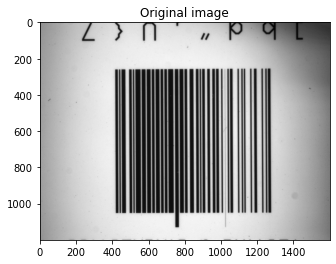

In [4]:
image_path = f'../images/{images_paths[0]}'
print(image_path)
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   

plt.figure()
plt.imshow(gray, 'gray')
plt.title('Original image')  

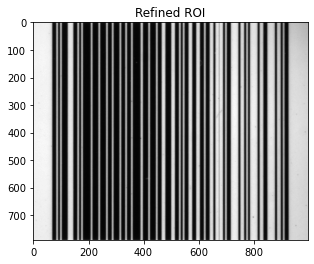

In [5]:
roi_image, bb_points_sorted_rot, bb_width, bb_height = detect_and_refine_boundingBox(image, 
                            use_same_threshold=False, compute_barcode_structure_algorithm=1, verbose_timing=False,
                            outlier_detection_level=0.02, visualization_dict={'visualize_refined_roi':True})

## COMPUTING THE SCAN LINES

In [6]:
bb_height

790

In [7]:
scanlines_indices = np.linspace(start=0, stop=bb_height, num=12, dtype=int)[1:-1]
scanlines_indices

array([ 71, 143, 215, 287, 359, 430, 502, 574, 646, 718])

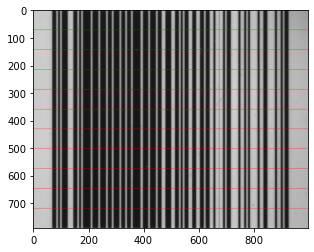

In [8]:
roi_image_tmp = roi_image.copy()
roi_image_tmp = cv2.cvtColor(roi_image_tmp, cv2.COLOR_GRAY2RGB)
roi_image_tmp[scanlines_indices,:,:] = np.array([255,0,0])
plt.figure()
plt.imshow(roi_image_tmp, 'gray') 

## NORMALIZING THE IMAGE

In [9]:
roi_image_norm = 100*(roi_image/255)

In [10]:
roi_image_norm

array([[78.43137255, 77.64705882, 77.25490196, ..., 61.17647059,
        60.        , 58.43137255],
       [76.07843137, 78.43137255, 78.43137255, ..., 60.39215686,
        60.39215686, 59.21568627],
       [77.25490196, 78.82352941, 76.8627451 , ..., 60.78431373,
        59.60784314, 60.        ],
       ...,
       [76.47058824, 76.8627451 , 76.47058824, ..., 68.23529412,
        69.01960784, 69.01960784],
       [76.47058824, 76.8627451 , 76.8627451 , ..., 69.01960784,
        69.41176471, 69.41176471],
       [76.8627451 , 77.64705882, 77.64705882, ..., 69.01960784,
        69.41176471, 69.41176471]])

In [11]:
#roi_image_norm

In [12]:
#roi_image_norm

In [13]:
#roi_image_norm = np.rint(100*(roi_image/255))

In [14]:
#roi_image_norm

## CONSIDERING ONE SCANLINE
We focus on one scanline, and we compute the parameters.

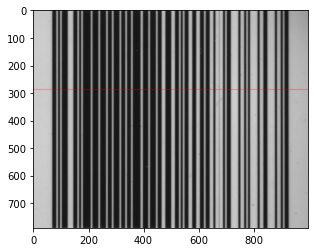

In [15]:
scanline_index = scanlines_indices[3]#math.ceil(bb_height/2)

roi_image_tmp = roi_image.copy()
roi_image_tmp = cv2.cvtColor(roi_image_tmp, cv2.COLOR_GRAY2RGB)
roi_image_tmp[scanline_index,:,:] = np.array([255,0,0])
plt.figure()
plt.imshow(roi_image_tmp, 'gray') 

In [16]:
scanline = roi_image_norm[scanline_index, :]

Text(0.5, 1.0, 'Scan reflectance profile')

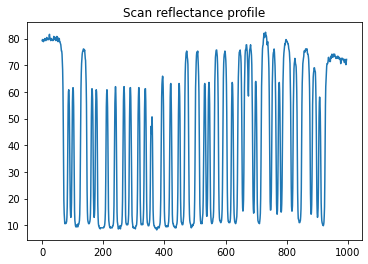

In [17]:
plt.plot(scanline)
plt.title('Scan reflectance profile')

## R_min, R_max, SC, GB

In [18]:
#100*(roi_image[scanline_index,:].max()-roi_image[scanline_index,:].min())/255

74.11764705882354

In [670]:
#math.floor(scanline.max())-math.floor(scanline.min())

81

In [19]:
R_min = scanline.min()
R_max = scanline.max()

In [20]:
R_min, R_max

(8.235294117647058, 82.35294117647058)

In [21]:
SC = R_max - R_min
SC

74.11764705882352

In [22]:
GB = R_min + SC/2
GB

45.29411764705882

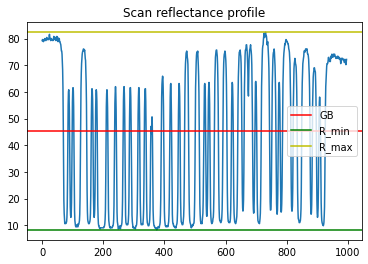

In [23]:
plt.plot(scanline)
plt.axhline(GB, c='r', label='GB')
plt.axhline(R_min, c='g', label='R_min')
plt.axhline(R_max, c='y', label='R_max')
plt.title('Scan reflectance profile')
plt.legend()

The wrong black line within a space can be noticed.

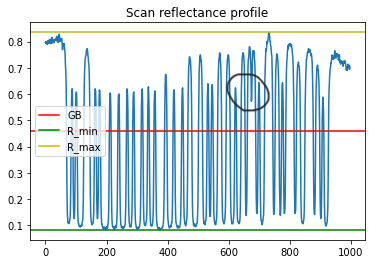

## TESTS ON DIFFERENT SCANLINES

(5, 2)


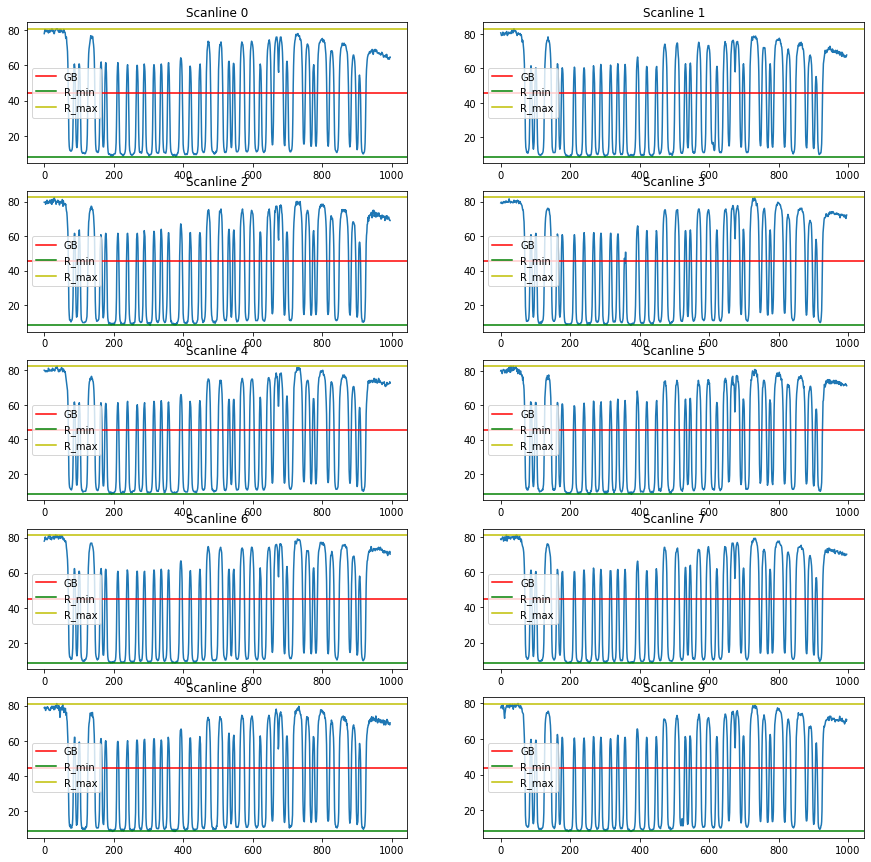

In [38]:
R_min_list = []
R_max_list = []
SC_list = []
GB_list = []

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,15), squeeze=True)
#print(axs.shape)

for i, scanline_index in enumerate(scanlines_indices):
    scanline = roi_image_norm[scanline_index, :]
    
    R_min = scanline.min()
    R_max = scanline.max()
    R_min_list.append(R_min)
    R_max_list.append(R_max)
    
    SC = R_max - R_min
    SC_list.append(SC)
    
    GB = R_min + SC/2
    GB_list.append(GB)
    
    axs[i//2,i%2].plot(scanline)
    axs[i//2,i%2].axhline(GB, c='r', label='GB')
    axs[i//2,i%2].axhline(R_min, c='g', label='R_min')
    axs[i//2,i%2].axhline(R_max, c='y', label='R_max')
    axs[i//2,i%2].set_title(f'Scanline {i}')
    axs[i//2,i%2].legend()

In [39]:
print('R_min_list:', R_min_list)
R_min = np.mean(R_min_list)
print('R_min mean:', R_min)
print()

print('R_max_list:', R_max_list)
R_max = np.mean(R_max_list)
print('R_max mean:', R_max)
print()

if R_min<=0.5*R_max:
    R_min_grade = 'A'
else:
    R_min_grade = 'F'
print('R_min_grade:', R_min_grade)

R_min_list: [8.235294117647058, 8.627450980392156, 8.235294117647058, 8.235294117647058, 8.235294117647058, 8.235294117647058, 8.627450980392156, 8.627450980392156, 8.235294117647058, 8.235294117647058]
R_min mean: 8.352941176470587

R_max_list: [80.7843137254902, 83.13725490196079, 82.35294117647058, 82.35294117647058, 82.35294117647058, 82.74509803921568, 81.56862745098039, 81.17647058823529, 81.17647058823529, 79.6078431372549]
R_max mean: 81.72549019607843

R_min_grade: A


In [40]:
print('SC_list:', SC_list)
SC = np.mean(SC_list)
print('SC mean:', SC)
print()

if SC>=70:
    SC_grade = 'A'
elif SC>=55:
    SC_grade = 'B'
elif SC>=40:
    SC_grade = 'C'
elif SC>=20:
    SC_grade = 'D'
else:
    SC_grade = 'F'
print('SC_grade:', SC_grade)

SC_list: [72.54901960784314, 74.50980392156863, 74.11764705882352, 74.11764705882352, 74.11764705882352, 74.50980392156862, 72.94117647058823, 72.54901960784314, 72.94117647058823, 71.37254901960785]
SC mean: 73.37254901960783

SC_grade: A


In [41]:
print('GB_list:', GB_list)
print('GB mean:', np.mean(GB_list))

GB_list: [44.509803921568626, 45.88235294117647, 45.29411764705882, 45.29411764705882, 45.29411764705882, 45.49019607843137, 45.09803921568627, 44.90196078431372, 44.705882352941174, 43.92156862745098]
GB mean: 45.03921568627451
